In [ ]:
# !pip install imblearn --upgrade
# !pip install plotly --upgrade
# !pip install matplotlib
# !pip install seaborn
# !pip install pandas

In [69]:
import plotly
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTENC
sns.set(style="darkgrid")

## Data Preprocessing and Visualization

In [2]:
data = pd.read_csv("equipment_failure_data_1.csv", header=0)

In [3]:
data.head()

,ID,DATE,REGION_CLUSTER,MAINTENANCE_VENDOR,MANUFACTURER,WELL_GROUP,S15,S17,S13,S5,S16,S19,S18,EQUIPMENT_FAILURE,S8,AGE_OF_EQUIPMENT
0,100001,12/2/14,G,O,Y,1,11.088000,145.223448,39.34,3501.0,8.426869,1.9,24.610345,0,0.0,880
1,100001,12/3/14,G,O,Y,1,8.877943,187.573214,39.20,3489.0,6.483714,1.9,24.671429,0,0.0,881
2,100001,12/4/14,G,O,Y,1,8.676444,148.363704,38.87,3459.0,6.159659,2.0,24.733333,0,0.0,882
3,100001,12/5/14,G,O,Y,1,9.988338,133.660000,39.47,3513.0,9.320308,2.0,24.773077,0,0.0,883
4,100001,12/6/14,G,O,Y,1,8.475264,197.181600,40.33,3589.0,8.022960,1.5,24.808000,0,0.0,884


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149855 entries, 0 to 149854
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ID                  149855 non-null  int64  
 1   DATE                149855 non-null  object 
 2   REGION_CLUSTER      149855 non-null  object 
 3   MAINTENANCE_VENDOR  149855 non-null  object 
 4   MANUFACTURER        149855 non-null  object 
 5   WELL_GROUP          149855 non-null  int64  
 6   S15                 149855 non-null  float64
 7   S17                 149855 non-null  float64
 8   S13                 149855 non-null  float64
 9   S5                  149855 non-null  float64
 10  S16                 149855 non-null  float64
 11  S19                 149855 non-null  float64
 12  S18                 149855 non-null  float64
 13  EQUIPMENT_FAILURE   149855 non-null  int64  
 14  S8                  149855 non-null  float64
 15  AGE_OF_EQUIPMENT    149855 non-nul

In [10]:
data.describe()

,ID,WELL_GROUP,S15,S17,S13,S5,S16,S19,S18,EQUIPMENT_FAILURE,S8,AGE_OF_EQUIPMENT
count,149855.000000,149855.000000,149855.000000,149855.000000,149855.000000,149855.000000,149855.000000,149855.000000,149855.000000,149855.000000,149855.000000,149855.000000
mean,100320.419512,2.497561,14.185534,85.918460,35.643733,4557.518000,7.925408,8.229842,110.082879,0.001368,117.481750,2751.146341
std,178.503502,1.093775,8.665254,85.572229,14.723678,2497.993986,2.426462,13.041714,197.356230,0.036961,204.107481,3368.354905
min,100001.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-16.490000,0.000000
25%,100164.000000,2.000000,7.548000,0.000000,28.250000,3193.000000,6.596000,0.900000,11.300000,0.000000,8.660000,755.000000
50%,100328.000000,2.000000,11.077500,95.480000,35.020000,4224.000000,8.025600,4.200000,34.000000,0.000000,44.320000,1143.000000
75%,100472.000000,3.000000,22.080000,163.660000,41.940833,5615.000000,9.480700,10.500000,118.900000,0.000000,135.080000,3224.500000
max,100612.000000,4.000000,51.225600,478.470000,570.510000,52767.000000,23.533800,291.100000,3995.900000,1.000000,1824.960000,15170.000000


In [37]:
# check for missing data
data.isnull().sum(axis = 0)

ID                    0
DATE                  0
REGION_CLUSTER        0
MAINTENANCE_VENDOR    0
MANUFACTURER          0
WELL_GROUP            0
S15                   0
S17                   0
S13                   0
S5                    0
S16                   0
S19                   0
S18                   0
EQUIPMENT_FAILURE     0
S8                    0
AGE_OF_EQUIPMENT      0
dtype: int64

In [38]:
# check for duplicates 
len(data)-len(data.drop_duplicates())

0

In [46]:
# check for number failures (=205)
data['EQUIPMENT_FAILURE'].value_counts()

0    149650
1       205
Name: EQUIPMENT_FAILURE, dtype: int64

In [58]:
# check number of different machines (=205)
data['ID'].value_counts()

100001    731
100443    731
100419    731
100423    731
100425    731
         ... 
100237    731
100240    731
100241    731
100244    731
100612    731
Name: ID, Length: 205, dtype: int64

In [57]:
# check number of different dates (=731)
data['DATE'].value_counts()

2014-12-02    205
2016-03-26    205
2016-03-28    205
2016-03-29    205
2016-03-30    205
             ... 
2015-08-04    205
2015-08-05    205
2015-08-06    205
2015-08-07    205
2016-12-01    205
Name: DATE, Length: 731, dtype: int64

<AxesSubplot:>

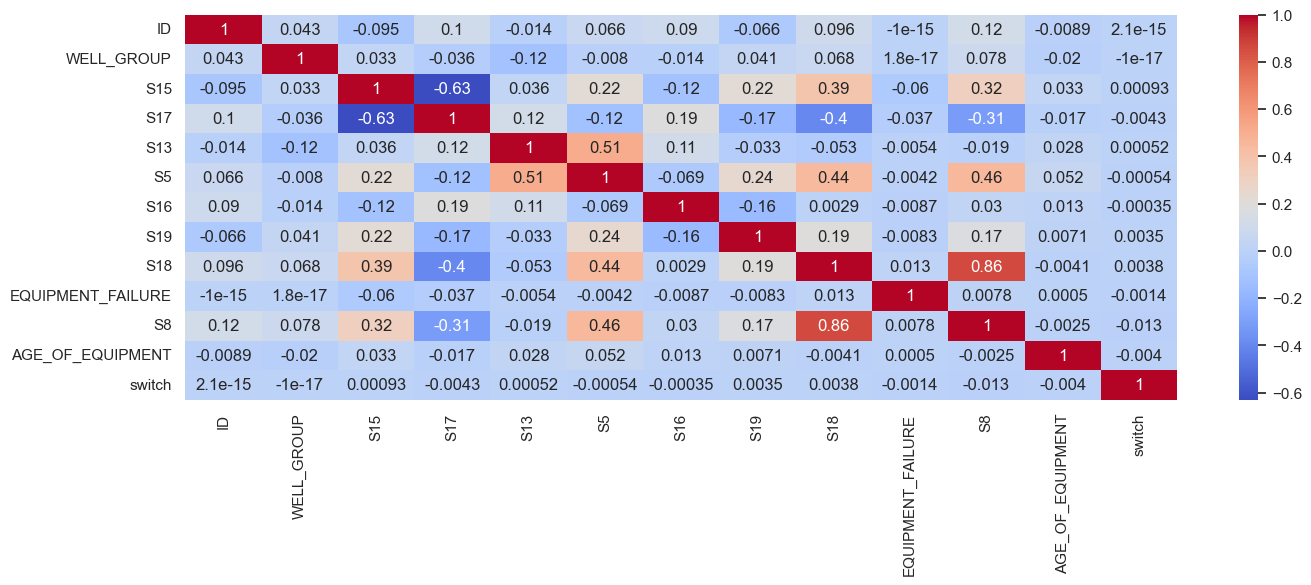

In [70]:
# Correlation between different variables
plt.figure(figsize = (16,5))
sns.heatmap(data.corr(method='pearson'),cmap='coolwarm',annot=True)

In [74]:
# Correlation between different dependent and independent variables
data.corr()['EQUIPMENT_FAILURE']

ID                  -1.002965e-15
WELL_GROUP           1.755806e-17
S15                 -5.997746e-02
S17                 -3.673575e-02
S13                 -5.387080e-03
S5                  -4.194914e-03
S16                 -8.667327e-03
S19                 -8.325554e-03
S18                  1.283648e-02
EQUIPMENT_FAILURE    1.000000e+00
S8                   7.830244e-03
AGE_OF_EQUIPMENT     4.989128e-04
switch              -1.369863e-03
Name: EQUIPMENT_FAILURE, dtype: float64

In [78]:
# given to small number of failures, we will visualize relations only 
failed_data = data[data['EQUIPMENT_FAILURE'] == 1]
failed_data

,ID,DATE,REGION_CLUSTER,MAINTENANCE_VENDOR,MANUFACTURER,WELL_GROUP,S15,S17,S13,S5,S16,S19,S18,EQUIPMENT_FAILURE,S8,AGE_OF_EQUIPMENT,switch
143,100001,2015-04-24,G,O,Y,1,0.0,0.0,0.000000,0.000000,8.8924,0.90,170.4,1,0.000000,1023,0
1452,100003,2016-11-22,C,L,T,1,0.0,0.0,0.000000,0.000000,8.7048,0.00,4.4,1,0.000000,1121,0
1974,100009,2016-04-27,H,M,X,3,0.0,0.0,23.614483,7202.413793,3.2824,42.70,57.1,1,89.084138,832,0
2882,100014,2016-10-21,H,M,S,2,0.0,0.0,24.680690,5257.103448,3.7310,25.50,43.1,1,45.019310,1449,0
2940,100017,2014-12-18,E,K,T,2,0.0,0.0,29.906154,5233.307692,8.4132,0.10,678.0,1,1.092308,9996,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146442,100599,2015-08-01,H,K,R,1,0.0,0.0,24.995862,7623.862069,4.6543,12.63,341.2,1,357.989655,802,0
146961,100600,2015-01-01,D,J,V,1,0.0,0.0,35.679130,4245.739130,6.8880,14.80,423.0,1,0.000000,1730,0
148128,100610,2016-03-12,E,P,Z,4,0.0,0.0,44.325217,13519.347830,6.1952,0.90,1078.9,1,1128.495652,906,0
148921,100611,2016-05-13,B,O,W,3,0.0,0.0,31.100000,6624.000000,6.2475,0.00,780.7,1,878.300000,3808,0


<AxesSubplot:xlabel='MANUFACTURER', ylabel='Count'>

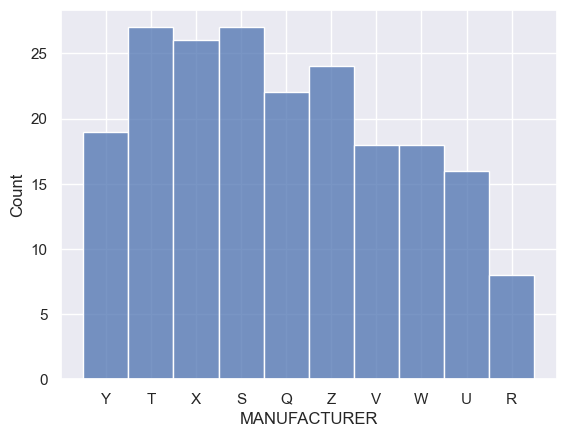

In [82]:
sns.histplot(data_failed, x='MANUFACTURER')

<AxesSubplot:xlabel='MAINTENANCE_VENDOR', ylabel='Count'>

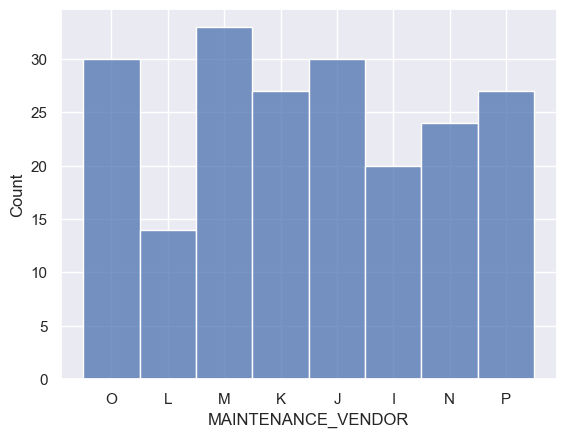

In [84]:
sns.histplot(data_failed, x='MAINTENANCE_VENDOR')

## Feature Engineering

In [39]:
data['DATE'] = pd.to_datetime(data['DATE'])
data.head()

,ID,DATE,REGION_CLUSTER,MAINTENANCE_VENDOR,MANUFACTURER,WELL_GROUP,S15,S17,S13,S5,S16,S19,S18,EQUIPMENT_FAILURE,S8,AGE_OF_EQUIPMENT
0,100001,2014-12-02,G,O,Y,1,11.088000,145.223448,39.34,3501.0,8.426869,1.9,24.610345,0,0.0,880
1,100001,2014-12-03,G,O,Y,1,8.877943,187.573214,39.20,3489.0,6.483714,1.9,24.671429,0,0.0,881
2,100001,2014-12-04,G,O,Y,1,8.676444,148.363704,38.87,3459.0,6.159659,2.0,24.733333,0,0.0,882
3,100001,2014-12-05,G,O,Y,1,9.988338,133.660000,39.47,3513.0,9.320308,2.0,24.773077,0,0.0,883
4,100001,2014-12-06,G,O,Y,1,8.475264,197.181600,40.33,3589.0,8.022960,1.5,24.808000,0,0.0,884


In [66]:
# sort data based on ID and date
data = data.sort_values(by=['ID','DATE'], ascending=[True, True])

# create a new column called “switch” that indicates when the id changes
data['switch'] = np.where((data['ID'] != data['ID'].shift(1)), 1, 0)
data.head()

,ID,DATE,REGION_CLUSTER,MAINTENANCE_VENDOR,MANUFACTURER,WELL_GROUP,S15,S17,S13,S5,S16,S19,S18,EQUIPMENT_FAILURE,S8,AGE_OF_EQUIPMENT,switch
0,100001,2014-12-02,G,O,Y,1,11.088000,145.223448,39.34,3501.0,8.426869,1.9,24.610345,0,0.0,880,1
1,100001,2014-12-03,G,O,Y,1,8.877943,187.573214,39.20,3489.0,6.483714,1.9,24.671429,0,0.0,881,0
2,100001,2014-12-04,G,O,Y,1,8.676444,148.363704,38.87,3459.0,6.159659,2.0,24.733333,0,0.0,882,0
3,100001,2014-12-05,G,O,Y,1,9.988338,133.660000,39.47,3513.0,9.320308,2.0,24.773077,0,0.0,883,0
4,100001,2014-12-06,G,O,Y,1,8.475264,197.181600,40.33,3589.0,8.022960,1.5,24.808000,0,0.0,884,0


In [94]:
dfx = data
starter = dfx[dfx['switch'] == 1]
starter = starter[['DATE','ID']]
#rename date to start_date
starter = starter.rename(index=str, columns={"DATE": "START_DATE"})
#Merge START_DATE to the original data set
dfx=dfx.sort_values(by=['ID', 'DATE'], ascending=[True, True])
starter=starter.sort_values(by=['ID'], ascending=[True])
starter

,START_DATE,ID
0,2014-12-02,100001
731,2014-12-02,100003
1462,2014-12-02,100009
2193,2014-12-02,100014
2924,2014-12-02,100017
...,...,...
146200,2014-12-02,100599
146931,2014-12-02,100600
147662,2014-12-02,100610
148393,2014-12-02,100611


In [ ]:
#define a time window which is the number of days we will look backward into a time series of sensor values.
time_window=21

dfx = data
#Select the first record of each machine
starter = dfx[dfx['flipper'] == 1]
starter = starter[['DATE','ID']]
#rename date to start_date
starter=starter.rename(index=str, columns={"DATE": "START_DATE"})
#convert START_DATE to date
starter['START_DATE'] = pd.to_datetime(starter['START_DATE'])
#Merge START_DATE to the original data set
dfx=dfx.sort_values(by=['ID', 'DATE'], ascending=[True, True])
starter=starter.sort_values(by=['ID'], ascending=[True])
dfx =dfx.merge(starter, on=['ID'], how='left')
# calculate the number of days since the beginning of each well. 
dfx['C'] = dfx['DATE'] - dfx['START_DATE']
dfx['TIME_SINCE_START'] = dfx['C'] / np.timedelta64(1, 'D')
dfx=dfx.drop(columns=['C'])
dfx['too_soon'] = np.where((dfx.TIME_SINCE_START < feature_window) , 1, 0)